In [1]:
%matplotlib inline

In [40]:
from sympy.stats import Normal, density, DiscreteUniform, P, sample, Die, Coin, given, E
from sympy import Symbol, pprint, symbols, Symbol, Eq, lambdify, init_printing, simplify
init_printing() 

In [13]:
from ipywidgets import interact, IntSlider, FloatSlider
import matplotlib.pyplot as plt
import numpy as np

# Additionnal Notes

## Section 1.4 Discrete probability examples: genetics and spell checking

(page 9) It was not obvious to me how the posterior probability was calculated for the third son
$$Pr(\theta=1|y_1,y_2,y_3)=\frac{(0.5)(0.2)}{(0.5)(0.2)+(1)(0.8)}$$

Best thing to do in that case is to go back to the basics
$$Pr(\theta=1|y_1,y_2,y_3)=\frac{Pr(\theta=1,y_1,y_2,y_3)}{Pr(y_1,y_2,y_3)}\\
=\frac{Pr(\theta=1,y_1,y_2,y_3)}{Pr(y_1,y_2,y_3)}$$

Let's work on the numerator first <br>
$Pr(\theta=1,y_1,y_2,y_3)$<br>
$=Pr(y_3|\theta=1,y_1,y_2)Pr(\theta=1,y_1,y_2)$<br>
$=Pr(y_3|\theta=1)Pr(\theta=1,y_1,y_2)$ *because of the conditional independance on $\theta$*<br>
$=Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)Pr(y_1,y_2)$ *simple Bayes rule*

Denominator
$Pr(y_1,y_2,y_3)$<br>
$=Pr(y_1,y_2,y_3,\theta=0)+Pr(y_1,y_2,y_3,\theta=1)$<br>
$=Pr(y_3|\theta=0,y_1,y_2)Pr(\theta=0,y_1,y_2)+Pr(y_3|\theta=1,y_1,y_2)Pr(\theta=1,y_1,y_2)$<br>
$=Pr(y_3|\theta=0)Pr(\theta=0|y_1,y_2)Pr(y_1,y_2)+Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)Pr(y_1,y_2)$ *same as above*<br>

Put everything together<br>
$\frac{Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)Pr(y_1,y_2)}{Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)Pr(y_1,y_2)+Pr(y_3|\theta=0)Pr(\theta=0|y_1,y_2)Pr(y_1,y_2)}$<br>
$=\frac{Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)}{Pr(y_3|\theta=1)Pr(\theta=1|y_1,y_2)+Pr(y_3|\theta=0)Pr(\theta=0|y_1,y_2)}$<br>
$=\frac{(0.5)(0.2)}{(0.5)(0.2)+(1)(0.8)}$

<dl>
    <dt>1</dt>
    <dd>Conditional probability: suppose that if $\theta=1$, then *y* has a normal distribution with mean 1 and standard deviation $\sigma$, and if $\theta=2$, then *y* has a normal distribution with mean 2 and standard deviation $\sigma$. Also, suppose $Pr(\theta=1)=0.5$ and $Pr(\theta=2)=0.5$
    </dd>
</dl>

In [27]:
sigma = Symbol("sigma", positive=True)
mu = DiscreteUniform('mu', [1,2])
N = Normal('normal', mu, sigma)

<dl>
    <dt>1a</dt>
    <dd>For $\sigma=2$, write the formula for the marginal probability density for *y* and sketch it
    </dd>
</dl>

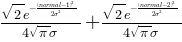

In [31]:
marginal = sum(P(Eq(mu,i))*given(N, Eq(mu,i)).pspace.pdf for i in [1,2])
marginal

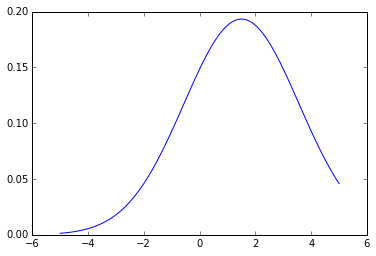

In [32]:
X = np.linspace(-5,5,100)
f = lambdify(N, marginal.subs(sigma, 2), "numpy")
plt.plot(X, f(X))

<dl>
    <dt>1b</dt>
    <dd>What is $Pr(\theta=1|y=1)$, again supposing $\sigma=2$?
    </dd>
</dl>

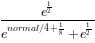

In [43]:
sampling_dist = given(N, Eq(mu,1)).pspace.pdf
prior = P(Eq(mu,1))
post = prior * sampling_dist / marginal
simplify(post.subs(sigma, 2))

<dl>
    <dt>1c</dt>
    <dd>Describe how the posterior density of $\theta$ changes in shape as $\sigma$ is increased and is it is decreased.
    </dd>
</dl>

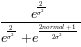

In [42]:
simplify(post)

<p>As sigma increases, say towards infinity, every exponant tend to 1, simplifying to 1/2</p>

None

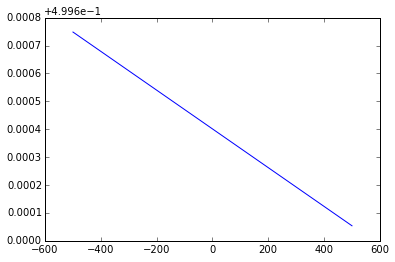

In [44]:
@interact(sig = FloatSlider(min=0.1, max=600, value=2))
def plot(sig=1):
    X = np.linspace(-500,500,10000)
    f = lambdify(N, post.subs(sigma, sig), "numpy")
    plt.plot(X, f(X))

In [10]:
density(post.subs(sigma, sigma))(Symbol('x'))

ValueError: Overlapping Random Variables

In [86]:
mu = DiscreteUniform('mu', [1,2])

In [118]:
N = Normal('a', mu, sigma)

In [96]:
post = given(N, Eq(mu,1))
p_mu = P(Eq(mu,1))
p_y = P(Eq(mu,1))*given(N, Eq(mu,1))+P(Eq(mu,2))*given(N, Eq(mu,2))


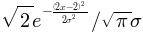

In [113]:
density(P(Eq(mu,1))*post+P(Eq(mu,2)))(Symbol('x'))

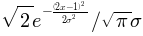

In [115]:
density(P(Eq(mu,1))*post)(Symbol('x'))

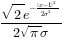

In [116]:
density(post)(Symbol('x'))

In [119]:
density(N)(Symbol('x'))

NotImplementedError: 

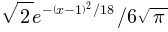

In [107]:
density(given(N, Eq(mu,1)))(Symbol('x')).subs(sigma,3)

In [97]:
density(p_mu*post/p_y)(Symbol('x'))

ValueError: Overlapping Random Variables

In [85]:
P(Eq(X,1))

In [38]:
d = Die('d1')

In [71]:
P(Eq(d,1))

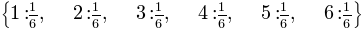

In [51]:
_.dict

In [68]:
c = Coin('c')

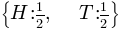

In [69]:
density(c).dict

In [74]:
P(Eq(c,Symbol('H')))

In [76]:
density(N).expr

AttributeError: 'NormalDistribution' object has not attribute 'expr'

In [78]:
given?